In [1]:
df <- read.csv("penguins.csv") #loading the dataset
print(head(df))

  species    island bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1  Adelie Torgersen           39.1          18.7               181        3750
2  Adelie Torgersen           39.5          17.4               186        3800
3  Adelie Torgersen           40.3          18.0               195        3250
4  Adelie Torgersen             NA            NA                NA          NA
5  Adelie Torgersen           36.7          19.3               193        3450
6  Adelie Torgersen           39.3          20.6               190        3650
     sex year
1   male 2007
2 female 2007
3 female 2007
4   <NA> 2007
5 female 2007
6   male 2007


### Data Pre-processing

In [2]:
anyNA(df)
any(is.nan(unlist(df)))
any(is.infinite(unlist(df)))


[1] TRUE

[1] FALSE

[1] FALSE

This suggests that the dataset has na's but no infinite values or nan's.

In [3]:
df <- na.omit(df) #getting rid of all the na's
anyNA(df)

[1] FALSE

It is not feasible to run a linear regression model on the data with three of the variables being non numeric which appears to be used as target variables. But fortunately, all three non numeric columns can be made numeric without changing the meaning of the data.

In [4]:
# Print the unique values
print(unique(df$species))
print(unique(df$sex))
print(unique(df$island))

[1] "Adelie"    "Gentoo"    "Chinstrap"
[1] "male"   "female"
[1] "Torgersen" "Biscoe"    "Dream"    


In the dataset, there are three varieties of species, two types of sexes, and three different islands. These can be coded as 1,2, and 3 to make all the variables numeric.

In [5]:

unique_species <- unique(df$species)
unique_sex <- unique(df$sex)
unique_island <- unique(df$island)


# Convert unique values to numeric variables
species_numeric <- as.numeric(factor(unique_species))
sex_numeric <- ifelse(unique_sex == "male", 0, 1)
island_numeric <- as.numeric(factor(unique_island))

# Create data frames or named vectors for species, sex, and island
species_data <- data.frame(species = unique_species, numeric = as.numeric(factor(unique_species)))
sex_data <- data.frame(sex = unique_sex, numeric = sex_numeric)
island_data <- data.frame(island = unique_island, numeric = as.numeric(factor(unique_island)))

# Print the data frames or named vectors
print(species_data)
print(sex_data)
print(island_data)


    species numeric
1    Adelie       1
2    Gentoo       3
3 Chinstrap       2
     sex numeric
1   male       0
2 female       1
     island numeric
1 Torgersen       3
2    Biscoe       1
3     Dream       2


In [6]:
# Convert species, sex, and island columns to factors
df$species <- factor(df$species, levels = unique_species)
df$island <- factor(df$island, levels = unique_island)

# Convert factors to numeric
df$species_numeric <- as.numeric(df$species)
df$sex_numeric <- ifelse(df$sex == "male", 0, 1)
df$island_numeric <- as.numeric(df$island)

# Print the updated dataset
print(head(df))


  species    island bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1  Adelie Torgersen           39.1          18.7               181        3750
2  Adelie Torgersen           39.5          17.4               186        3800
3  Adelie Torgersen           40.3          18.0               195        3250
5  Adelie Torgersen           36.7          19.3               193        3450
6  Adelie Torgersen           39.3          20.6               190        3650
7  Adelie Torgersen           38.9          17.8               181        3625
     sex year species_numeric sex_numeric island_numeric
1   male 2007               1           0              1
2 female 2007               1           1              1
3 female 2007               1           1              1
5 female 2007               1           1              1
6   male 2007               1           0              1
7 female 2007               1           1              1


In [7]:
#remove the non-numeric columns
df <- df[, !(names(df) %in% c("species", "island", "sex"))] 
print(head(df))

  bill_length_mm bill_depth_mm flipper_length_mm body_mass_g year
1           39.1          18.7               181        3750 2007
2           39.5          17.4               186        3800 2007
3           40.3          18.0               195        3250 2007
5           36.7          19.3               193        3450 2007
6           39.3          20.6               190        3650 2007
7           38.9          17.8               181        3625 2007
  species_numeric sex_numeric island_numeric
1               1           0              1
2               1           1              1
3               1           1              1
5               1           1              1
6               1           0              1
7               1           1              1


In [8]:
n = floor(0.8 * nrow(df)) #the number corresponding to 80% of the data
index = sample(seq_len(nrow(df)), size = n) #randomly sampling indices for training set data

train = df[index, ] #set the training set to be the randomly sampled rows of the data frame
test = df[-index, ] #set the testing set to be the remaining rows
cat("There are", dim(train)[1], "rows and",dim(train)[2],"columns in the training set. ")  #check the dimensions
cat("There are", dim(test)[1], "rows and",dim(test)[2],"columns in the testing set.") 
df = train 

There are 266 rows and 8 columns in the training set. There are 67 rows and 8 columns in the testing set.

### Hypothesis Testing/t-test

To see if penguins really exhibit sexual dimorphism and thus probably different foraging behavior, first hypothesis testing needs to be done. The first and the clearest attribute to check should be body mass which is measured in grams here. 
The Null Hypothesis is assumed to be that there is no difference in body mass between male and female penguins, whereas the alternative hypothesis states that there is some difference in body mass between male and female penguins.

To restate,

Null Hypothesis (H0): There is no difference in body mass between male and female penguins.

Alternative Hypothesis (H1): There is difference in body mass between male and female penguins.

Hence, a t-test has been performed to check if the hypothesis stands the test.

In [9]:
# Load necessary libraries
library(boot)
library(tidyverse)

# Hypothesis Testing (t-test)
# Filter the data for male and female penguins
male_penguins <- df[df$sex_numeric == 0, "body_mass_g"]
female_penguins <- df[df$sex_numeric == 1, "body_mass_g"]

# Perform t-test
t_test_result <- t.test(male_penguins, female_penguins)

# Print the t-test result
cat("T-test Results:\n")
print(t_test_result)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.3     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


T-test Results:

	Welch Two Sample t-test

data:  male_penguins and female_penguins
t = 7.948, df = 261.34, p-value = 5.698e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 530.8390 880.4891
sample estimates:
mean of x mean of y 
 4537.500  3831.836 



From the above t-test output, it can be observed that the t-value is 7.7439. This indicates the magnitude of the difference between the means of male and female penguins, relative to the variability in the data.

On the other hand, the p-value is 2.307e794e-16 which is very close to 0. This is the probability of observing such extreme results (or more extreme) if the null hypothesis (that there is no difference in body mass between male and female penguins) were true. Since the p-value is extremely small, much less than the typical significance level of 0.05, we reject the null hypothesis. This suggests that there is a significant difference in body mass between male and female penguins.

The 95% confidence interval for the difference in means is ( 527.7581, 887.7325). This interval gives a range of plausible values for the true difference in means between male and female penguins. Since the interval does not include zero, it further supports the conclusion that there is a significant difference in body mass between male and female penguins.

The mean body mass of male penguins (mean of x) is 4580.153 grams. However, the mean body mass of female penguins (mean of y) is 3872.407 grams.

In summary, the results of the t-test indicate a statistically significant difference in body mass between male and female penguins, with female penguins having a lower mean body mass compared to male penguins.

### Multilple Linear Regression

To assess the explanatory value of various structural parameters for discerning sex of adult penguins, multiple linear regression was employed. The target variable was sex where males were coded as 0 and females coded as 1, in relation to four continuous structural size parameters including bill depth, bill length, flipper length, year, and body mass.

In [15]:
mlr_penguins <- lm(sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g + year, data = df)
summary(mlr_penguins)


Call:
lm(formula = sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm + 
    body_mass_g + year, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.75984 -0.23653  0.00418  0.23624  0.99521 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.946e+01  5.082e+01   0.776   0.4382    
bill_length_mm    -8.785e-03  4.853e-03  -1.810   0.0714 .  
bill_depth_mm     -1.800e-01  1.228e-02 -14.655   <2e-16 ***
flipper_length_mm  1.176e-03  3.399e-03   0.346   0.7295    
body_mass_g       -4.473e-04  5.072e-05  -8.818   <2e-16 ***
year              -1.685e-02  2.538e-02  -0.664   0.5072    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3148 on 260 degrees of freedom
Multiple R-squared:  0.6121,	Adjusted R-squared:  0.6046 
F-statistic: 82.05 on 5 and 260 DF,  p-value: < 2.2e-16


Coefficients with small p-values (typically < 0.05) are considered statistically significant. In this model, bill_depth_mm and body_mass_g have very small p-values (< 0.001), indicating that they are likely to be significant predictors of sex_numeric. On the other hand, bill_length_mm has a p-value of 0.0714, which is close to the conventional significance level of 0.05, suggesting it might be marginally significant.Flipper_length_mm and year have larger p-values, indicating that they may not be significant predictors of sex_numeric.

If we come down F-statistic, the F-statistic (82.05) tests the overall significance of the model. A large F-statistic with a small p-value (< 0.05) suggests that at least one of the predictor variables is significantly associated with the response variable.

Overall, the model suggests that bill_depth_mm and body_mass_g are strong predictors to predict sex, while the significance of bill_length_mm, flipper_length_mm, and year may be less certain. 

The next step is to use the model for prediction on the test data.

In [42]:
predictions <- predict(mlr_penguins, test)
mspe <- mean((test$sex_numeric - predictions)^2)
mspe

[1] 0.1017265

Here, the MSPE comes out to be 0.101726464202804, which is pretty good for a model. But with other features and variables, we can test if this is the best model. 
The next model that can be tested is the one that explores the relationship with preidctors of bill_length_mm, flipper_length_mm, and body_mass_g

In [43]:
mlr_penguins_2 <- lm(sex_numeric ~ bill_length_mm + flipper_length_mm + body_mass_g, data = df)
summary(mlr_penguins_2)


Call:
lm(formula = sex_numeric ~ bill_length_mm + flipper_length_mm + 
    body_mass_g, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92999 -0.36266  0.00449  0.36055  1.05922 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -6.175e-01  5.227e-01  -1.181    0.239    
bill_length_mm    -2.589e-02  6.296e-03  -4.112 5.25e-05 ***
flipper_length_mm  2.147e-02  3.938e-03   5.452 1.15e-07 ***
body_mass_g       -4.934e-04  6.648e-05  -7.422 1.62e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4247 on 262 degrees of freedom
Multiple R-squared:  0.2884,	Adjusted R-squared:  0.2803 
F-statistic: 35.39 on 3 and 262 DF,  p-value: < 2.2e-16


In this model, all three predictor variables have very small p-values (< 0.001), indicating that they are likely to be significant predictors. A large F-statistic with a small p-value (< 0.05) suggests that at least one of the predictor variables is significantly associated with the response variable.

Overall, the model suggests that bill_length_mm, flipper_length_mm, and body_mass_g are all significant predictors. The model has an R-squared value of 0.2884, indicating that these variables collectively explain approximately 28.84% of the variance in sex_numeric.

The next step is to use the model for prediction on the test data.

In [44]:
predictions2 <- predict(mlr_penguins_2, test)
mspe2 <- mean((test$sex_numeric - predictions2)^2)
mspe2


[1] 0.1881667

In summary, the higher MSPE of 0.188166736520739 for this model compared to the previous one suggests that the predictive performance of this model may be inferior. The next model that can be tested is the one that explores the relationship with preidctors of bill_length_mm, bill_length_mm, and flipper_length_mm.

In [45]:
mlr_penguins_3 <- lm(sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm, data = df)
summary(mlr_penguins_3)


Call:
lm(formula = sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97717 -0.25880  0.04725  0.25659  0.92098 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.427150   0.559253  15.069  < 2e-16 ***
bill_length_mm    -0.011909   0.005464  -2.179   0.0302 *  
bill_depth_mm     -0.188488   0.013922 -13.539  < 2e-16 ***
flipper_length_mm -0.020811   0.002495  -8.340 4.28e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3584 on 262 degrees of freedom
Multiple R-squared:  0.4933,	Adjusted R-squared:  0.4875 
F-statistic: 85.02 on 3 and 262 DF,  p-value: < 2.2e-16


In this model, all three predictor variables have very small p-values (< 0.001), indicating that they are likely to be significant predictors but specifically bill_depth_mm and flipper_length_mm show more promise.
Overall, the model suggests that bill_length_mm, bill_depth_mm, and flipper_length_mm are all significant predictors of sex_numeric. The model has an R-squared value of 0.4933, indicating that these variables collectively explain approximately 49.33% of the variance in sex_numeric.
The next step is to use the model for prediction on the test data.

In [46]:
predictions3 <- predict(mlr_penguins_3, test)
mspe3 <- mean((test$sex_numeric - predictions3)^2)
mspe3


[1] 0.1472379

The lower MSPE of 0.147237869518393 for this model compared to the previous one suggests that the predictive performance of this model may be superior. However, this value is still worse that the first model's MSPE of 0.101726464202804. This indicates that out of all three, first model performed the best. The last model is the one that makes the most sense. This model can have all the predictors of bill_length_mm, bill_length_mm, flipper_length_mm, and body_mass_g.

In [47]:
mlr_penguins_4 <- lm(sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g, data = df)
summary(mlr_penguins_4)


Call:
lm(formula = sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm + 
    body_mass_g, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74472 -0.23921  0.00052  0.23825  0.97782 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.706e+00  5.780e-01   9.872   <2e-16 ***
bill_length_mm    -8.385e-03  4.811e-03  -1.743   0.0825 .  
bill_depth_mm     -1.804e-01  1.225e-02 -14.730   <2e-16 ***
flipper_length_mm  5.104e-04  3.244e-03   0.157   0.8751    
body_mass_g       -4.396e-04  4.936e-05  -8.908   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3144 on 261 degrees of freedom
Multiple R-squared:  0.6114,	Adjusted R-squared:  0.6055 
F-statistic: 102.7 on 4 and 261 DF,  p-value: < 2.2e-16


In this model, all predictor variables except for flipper_length_mm have very small p-values (< 0.001), indicating that they are likely to be significant predictors of sex_numeric. A large F-statistic with a small p-value (< 0.05) suggests that at least one of the predictor variables is significantly associated with the response variable.
Overall, the model suggests that bill_length_mm, bill_depth_mm, and body_mass_g are all significant predictors, while flipper_length_mm may not be a significant predictor. The model has an R-squared value of 0.6114, indicating that these variables collectively explain approximately 61.14% of the variance in sex_numeric.

This is pretty similar to the first model. We can use the model to make predictions on the test data.

In [48]:
predictions4 <- predict(mlr_penguins_4, test)
mspe4 <- mean((test$sex_numeric - predictions4)^2)
mspe4


[1] 0.1016728

This model's MSPE is pretty similar to the first model, just a little better than that one. This also happens to be the best MSPE. Hence, we can say that this model works the best in making predictions.

### ANOVA

ANOVA table presents the results of an analysis of variance (ANOVA) for a linear regression model. For our analysis, we'll use the model that gives us the best results.

In [51]:
penguins_anova = anova(mlr_penguins_4)
penguins_anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
bill_length_mm,1,9.144418,9.14441844,92.49435,6.130106e-19
bill_depth_mm,1,14.681564,14.68156415,148.50171,2.414487e-27
flipper_length_mm,1,8.931954,8.93195388,90.34531,1.370091e-18
body_mass_g,1,7.844415,7.84441475,79.34502,9.125044e-17
Residuals,261,25.803664,0.09886461,NA,NA


Based on the provided ANOVA table, we can analyze how each of the variables (the different physical characteristics) affects the target variable sex .

The F-value for  bill_length_mm  is 92.49435, and the associated p-value is approximately 6.130106e-19. This suggests a statistically significant difference in  sex  based on  bill_length_mm , as the p-value is much less than the significance level of 0.05.

Furthermore, the F-value for  bill_depth_mm  is 148.50171, and the associated p-value is approximately 2.414487e-27. This makes it a highly statistically significant predictor.

The F-value for  flipper_length_mm  is 90.34531, and the associated p-value is approximately 1.370091e-18. This also suggests a statistically significant difference in  sex  based on flipper_length_mm.

Similarly, the F-value for body_mass_g is 79.34502, and the associated p-value is approximately 9.125044e-17. Hence, a statistically significant difference in sex based on body_mass_g.

All predictor variables (bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g) have very small p-values (< 0.05), indicating that they are likely to be significantly associated with the response variable. Overall, the model appears to be significant based on the F-statistic, indicating that at least one of the predictor variables is significantly associated with the response variable.

### Diagnostics of the model – goodness of fit, feature selection, residuals

To see the diagnostics, we pick the best model to see if it satisfies the modeling assumptions.

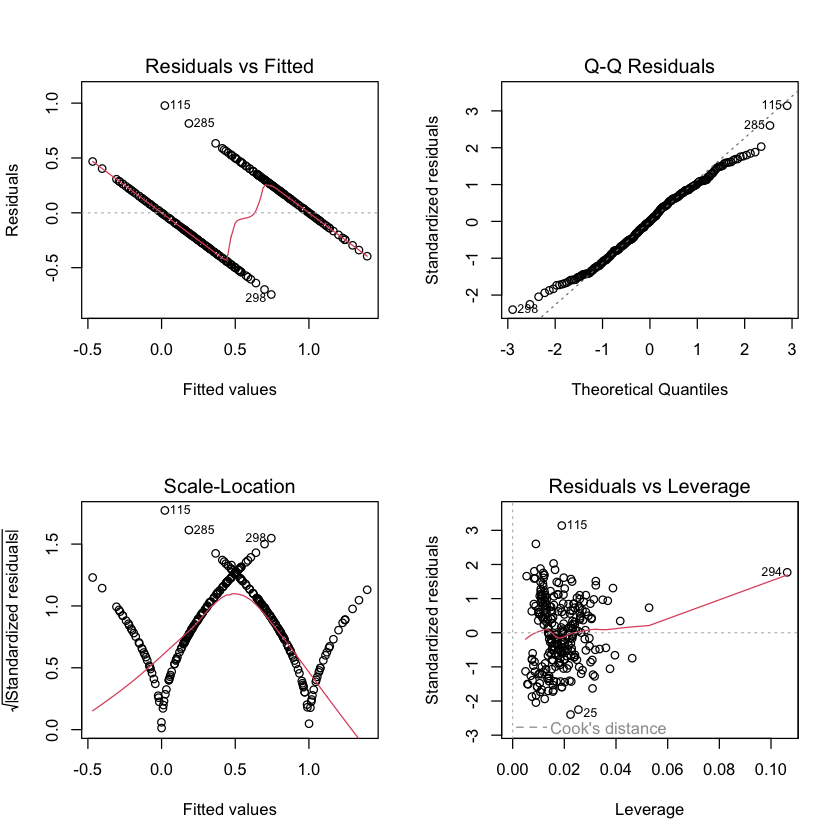

In [56]:
par(mfrow = c(2, 2))
plot(mlr_penguins_4)

1. Residuals vs fitted plot.
In this plot, there is a slight trend in the residuals. There are also outliers that are significantly farther away. This shows that the assumptions of linearity and homoscedasticity are not properly satisfied by the model.

2. Q-Q plot. 
In this plot, the points deviate from the straight line at the tails, which suggests that the residuals are not normally distributed.

3. Scale-location plot.
This Scale-Location plot have a bit of an evenly spread out data around the red regression line but also has several outliers. This plot can be used to further investigate homoscedasticity. The standardized residuals are spread out unevenly across the fitted values. It proves that the variance of the residuals is not constant across the range of fitted values. Hence, it is further prove of the unfitting assumption of homoscedasticity.

4. Standardized residuals vs leverage plot. 
The Residuals vs Leverage plot above shows some high Cook's distances. These can heavily influence the regression coefficients and the fit of the model.


To pick the best model, let's use parameters like AIC, BIC, and $R^2$.

In [68]:
df_fit <- df[, !(names(df) %in% c("year", "species_numeric", "island_numeric"))]
head(df_fit)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_numeric
,<dbl>,<dbl>,<int>,<int>,<dbl>
36,39.2,21.1,196,4150,0
2,39.5,17.4,186,3800,1
251,48.4,14.4,203,4625,1
171,46.2,14.5,209,4800,1
186,59.6,17.0,230,6050,0
115,39.6,20.7,191,3900,1


In [69]:
library(leaps)

reg_sub = regsubsets(sex_numeric ~ ., data = df_fit)
reg_sub_sum = summary(reg_sub)
reg_sub_sum$which

,(Intercept),bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
1,TRUE,FALSE,FALSE,FALSE,TRUE
2,TRUE,FALSE,TRUE,FALSE,TRUE
3,TRUE,TRUE,TRUE,FALSE,TRUE
4,TRUE,TRUE,TRUE,TRUE,TRUE


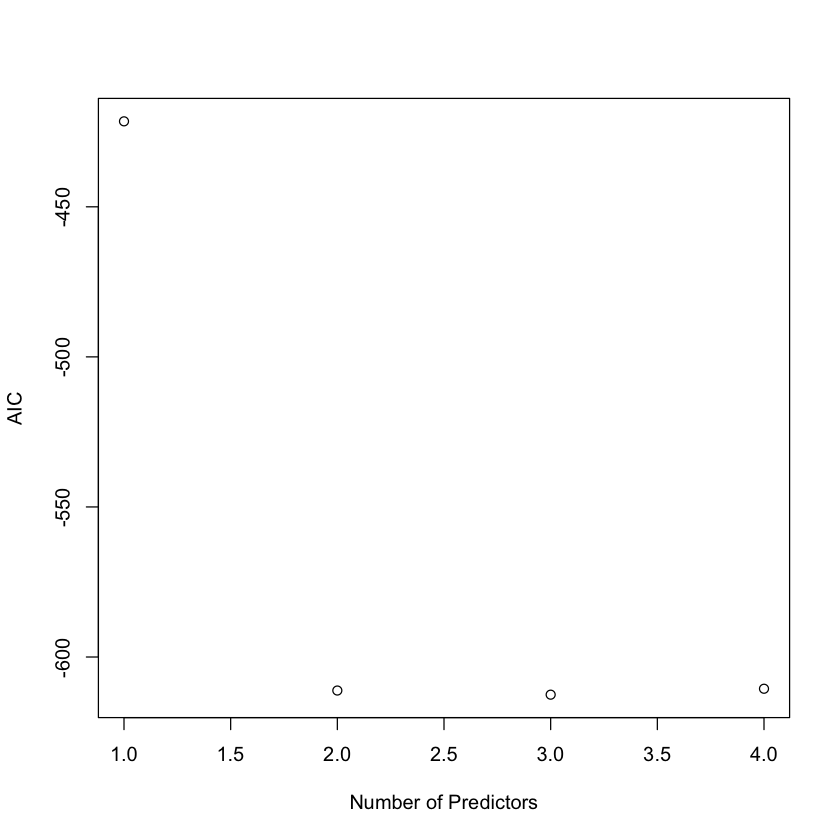

In [70]:
AIC = 2*(2:5) + n*log(reg_sub_sum$rss/n)
plot(AIC ~ I(1:4), xlab = "Number of Predictors", ylab = "AIC")

This plot shows that the model of size 3 has the lowest AIC. Hence, the model selection is

sex_numeric = $\widehat\beta_0 + \widehat\beta_1 \times$ `bill_length_mm` $ + \widehat\beta_2 \times$ `bill_depth_mm` $ + \widehat\beta_3 \times$ `body_mass_g`



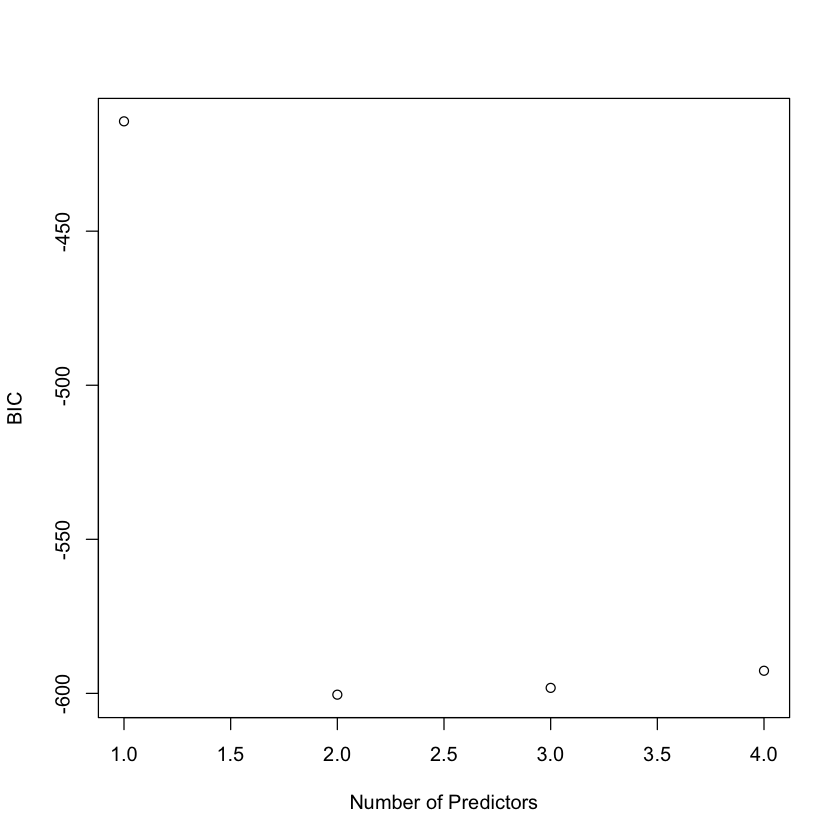

In [71]:
BIC = log(n)*(2:5) + n*log(reg_sub_sum$rss/n) 
plot(BIC ~ I(1:4), xlab = "Number of Predictors", ylab = "BIC")

This plot shows that the model of size 2 has the lowest BIC. Hence, the model selection is

sex_numeric = $\widehat\beta_0 + \widehat\beta_1 \times$ `bill_depth_mm` $ + \widehat\beta_2 \times$ `body_mass_g` $



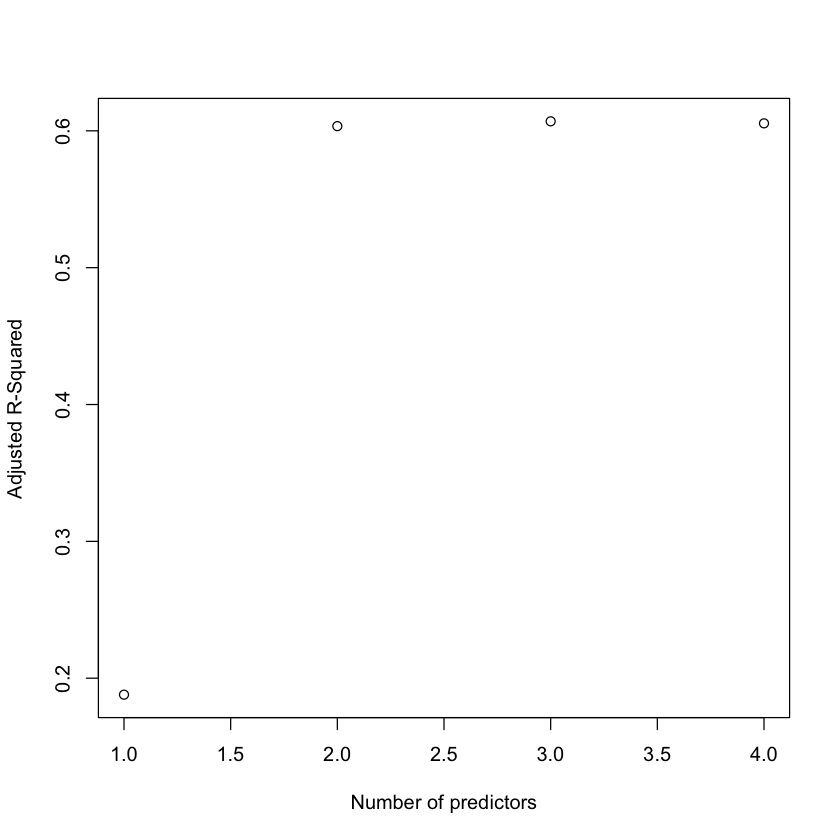

In [72]:
plot(1:4, reg_sub_sum$adjr2, xlab = "Number of predictors", ylab = "Adjusted R-Squared")


This plot shows that the model of size 3 and 4 has the highest $R^2$. Hence, the model selection is

sex_numeric = $\widehat\beta_0 + \widehat\beta_1 \times$ `bill_length_mm` $ + \widehat\beta_2 \times$ `bill_depth_mm` $ + \widehat\beta_3 \times$ `body_mass_g`

or

sex_numeric = $\widehat\beta_0 + \widehat\beta_1 \times$ `bill_length_mm` $ + \widehat\beta_2 \times$ `bill_depth_mm` $ + \widehat\beta_3 \times$ `flipper_length_mm` + $\widehat\beta_4 \times$ `body_mass_g`



Since all the models are either suggesting 3 or 4, we can pick either one of those to have the predictions.

### Generalized Linear Modeling

To assess the explanatory value of various structural parameters for discerning sex of adult penguins, logistic regression was employed using generalized linear models (GLM, family = binomial) to account for a response where males were coded as 0 and females coded as 1, in relation to four continuous structural size parameters including 1-culmen depth, 2-culmen length, 3- flipper length, and 4-body mass.

In [73]:
# Load necessary libraries
library(ggplot2) # for visualization
library(dplyr)    # for data manipulation

penguins_glm_model <- glm(sex_numeric ~ bill_depth_mm + bill_length_mm + flipper_length_mm + body_mass_g, data = df, family = binomial)

summary(penguins_glm_model)


Call:
glm(formula = sex_numeric ~ bill_depth_mm + bill_length_mm + 
    flipper_length_mm + body_mass_g, family = binomial, data = df)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       60.6229557  9.9102743   6.117 9.52e-10 ***
bill_depth_mm     -2.1579322  0.3059623  -7.053 1.75e-12 ***
bill_length_mm    -0.1066083  0.0546133  -1.952   0.0509 .  
flipper_length_mm  0.0255667  0.0376742   0.679   0.4974    
body_mass_g       -0.0057600  0.0009968  -5.778 7.55e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 368.38  on 265  degrees of freedom
Residual deviance: 121.03  on 261  degrees of freedom
AIC: 131.03

Number of Fisher Scoring iterations: 7



In this model bill_depth_mm, bill_length_mm, and body_mass_g have small p-values, suggesting that they are significant predictors of sex_numeric.
On the other hand, flipper_length_mm has a p-value greater than 0.05, indicating that it may not be a significant predictor in this model.

A lower residual deviance compared to the null deviance suggests that the model with the predictors explains more variability than a model with just the intercept. The AIC (Akaike Information Criterion) provides a measure of the relative quality of the model, with lower values indicating better fit.

In this case, the dispersion parameter is taken to be 1, indicating that the model fits the data well.

Overall, the logistic regression model suggests that bill_depth_mm, bill_length_mm, and body_mass_g are significant predictors of sex_numeric, while flipper_length_mm may not be a significant predictor in this particular model.

### Paper

Sexual segregation in vertebrate foraging niche is often associated with sexual size dimorphism. This often determines the nature of foraging. Studies of marine birds have documented differences in foraging behavior. However, sexually monomorphic species also exhibit sex-specific foraging, raising questions about the importance of structural size in mediating sexual differences in foraging behavior. The goal is to observe ecological sexual dimorphism among penguins, asking whether environmental variability is associated with differences in male and female foraging niche. It is interesting to predict if only certain species would forage sex-specifically, and which features would be associated with a more similar foraging niche among the sexes. 

Notes: 
Sexual monomorphism occurs when a species' male and female members have comparable or almost identical physical traits. On the other hand, sexual dimorphism refers to physical distinctions—like size, color, or body structure—between males and females within the same species.
Bill Length: The bill length of a penguin refers to the measurement of the length of its beak or bill.
Flipper Length: The flipper length of a penguin refers to the measurement of the length of its flipper or wing. 









Sources: Hugging Face Website (https://huggingface.co/datasets/SIH/palmer-penguins)
References: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. https://doi.org/10.1371/journal.pone.0090081
